# Visulisation of crime growth rate in each SAL region 

this notebook will visulise the crime growth rate at each SAL/suburb region

In [1]:
import pandas as pd
import matplotlib.pyplot as plt


### Read files

In [2]:
df = pd.read_csv('../data/curated/crime_count_SAL.csv')


### Plot a graph to show the crime growth rate in each suburb

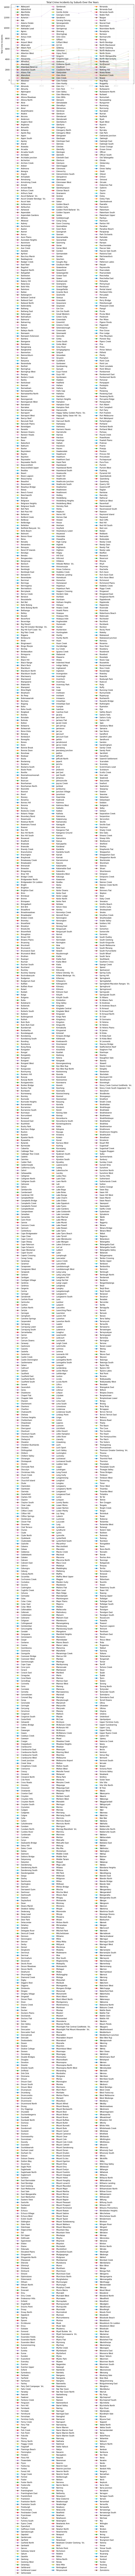

In [3]:
plt.figure(figsize=(12, 8))  # Adjust figure size as needed

# Group by SAL_NAME and iterate over groups
for suburb, data in df.groupby('SAL_NAME21'):
    # Convert DataFrame columns to numpy arrays for indexing
    years = data['Year'].values
    crime_incidents = data['total_crime_incidents'].values

    plt.plot(years, crime_incidents, marker='o', label=suburb)

plt.xlabel('Year')
plt.ylabel('Total Crime Incidents')
plt.title('Total Crime Incidents by Suburb Over the Years')
plt.legend(ncol=3)  # Change the number of columns as needed
plt.grid(True)
plt.show()

# Select top 10 Suburb with highest crime rate, and see their growth rate 

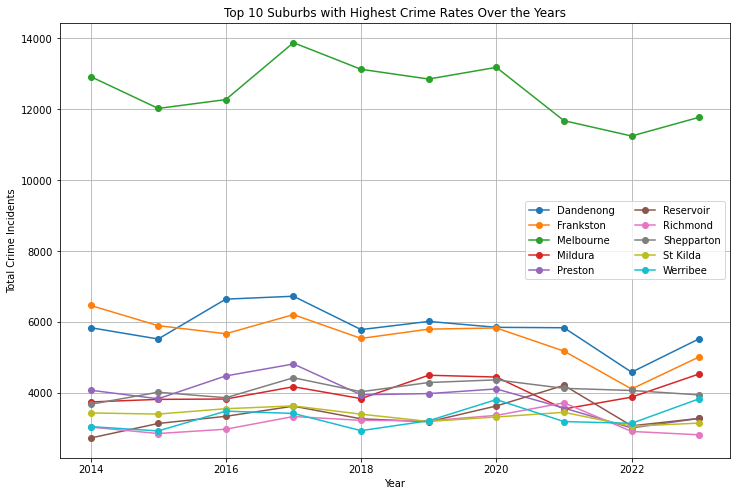

In [4]:
# Specify the number of top suburbs you want to visualize
top_n = 10

# Group by SAL_NAME and calculate the total crime incidents for each suburb
suburb_crime_totals = df.groupby('SAL_NAME21')['total_crime_incidents'].sum()

# Select the top N suburbs with the highest crime rates
top_suburbs = suburb_crime_totals.nlargest(top_n).index


# Filter the DataFrame to include only the top suburbs
filtered_df = df[df['SAL_NAME21'].isin(top_suburbs)]

plt.figure(figsize=(12, 8))  # Adjust figure size as needed

# Group by SAL_NAME and iterate over groups
for suburb, data in filtered_df.groupby('SAL_NAME21'):
    # Convert DataFrame columns to numpy arrays for indexing
    years = data['Year'].values
    crime_incidents = data['total_crime_incidents'].values

    plt.plot(years, crime_incidents, marker='o', label=suburb)

plt.xlabel('Year')
plt.ylabel('Total Crime Incidents')
plt.title(f'Top {top_n} Suburbs with Highest Crime Rates Over the Years')

# Add a legend with multiple columns
plt.legend(ncol=2)  # Change the number of columns as needed

plt.grid(True)
plt.show()

# Top 10 suburb in log scale

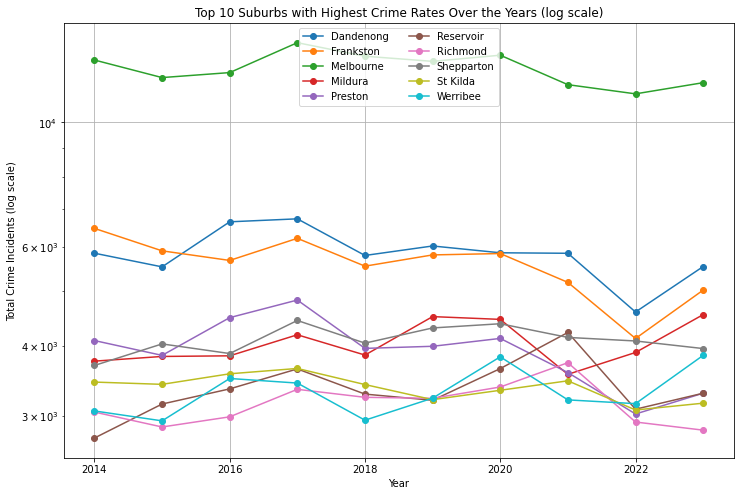

In [5]:
plt.figure(figsize=(12, 8))  # Adjust figure size as needed

# Group by SAL_NAME and iterate over groups
for suburb, data in filtered_df.groupby('SAL_NAME21'):
    # Convert DataFrame columns to numpy arrays for indexing
    years = data['Year'].values
    crime_incidents = data['total_crime_incidents'].values

    plt.plot(years, crime_incidents, marker='o', label=suburb)

plt.xlabel('Year')
plt.ylabel('Total Crime Incidents (log scale)')
plt.title(f'Top {top_n} Suburbs with Highest Crime Rates Over the Years (log scale)')

# Add a legend with multiple columns
plt.legend(ncol=2)  # Change the number of columns as needed

plt.grid(True)

# Apply a log scale to the y-axis
plt.yscale('log')

plt.show()